<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        I ) Importing Necessary Libraries
        </span>    
    </font>
</h2>

In [1]:
#import numpy and pandas 

import numpy as np
import pandas as pd

In [2]:
#import visualisation libraries 

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import machine learning libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4]:
import statsmodels.api as sms

In [5]:
import warnings
warnings.filterwarnings("ignore")

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        II ) Inspecting The Given Data
        </span>    
    </font>
</h2>

In [6]:
#read the given dataset [ bike renting data ]

br_data = pd.read_csv('/Users/prathiknsunku/Downloads/day.csv')

In [7]:
#print the first 5 rows of the imported csv file

br_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
#checking the shape of the data frame

In [9]:
br_data.shape

(730, 16)

In [10]:
br_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
br_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        III ) Checking columns for redundancy [ cleaning the data ]
        </span>    
    </font>
</h2>

In [12]:
#checking 'casual', 'registered' and 'cnt' columns

In [13]:
br_data[['casual','registered','cnt']].head()

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


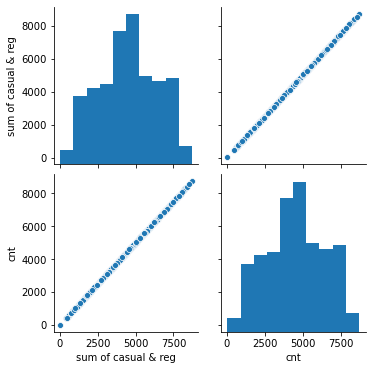

In [14]:
data_check1 = br_data[['casual','registered','cnt']]
data_check1['sum of casual & reg'] = data_check1['casual'] + data_check1['registered']
sns.pairplot(data_check1[['sum of casual & reg','cnt']])

In [15]:
#dropping 'casual' and 'registered' columns due to redundancy

In [16]:
br_data.drop(['casual'],axis=1,inplace=True)

In [17]:
br_data.drop(['registered'],axis=1,inplace=True)

In [18]:
#checking a heatmap to evaluate correlation between columns

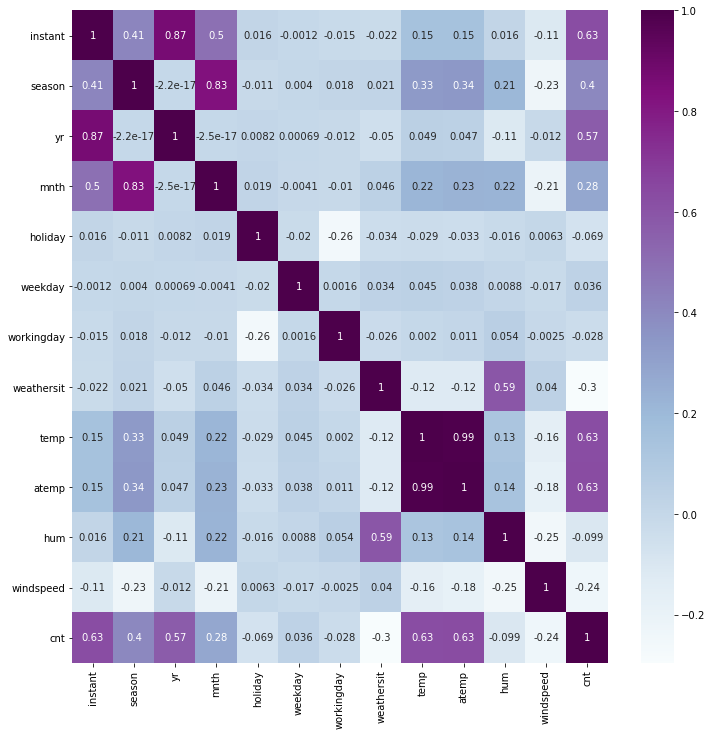

In [19]:
plt.figure(figsize = (12,12))
sns.heatmap(br_data.corr(), annot = True, cmap="BuPu")
plt.show()

In [20]:
#due to high correlation [ 0.99 ] between 'atemp' and 'temp', 'temp' is being dropped

In [21]:
br_data.drop(['temp'],axis=1,inplace=True)

In [22]:
br_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [23]:
br_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 74.3+ KB


In [24]:
#dropping 'instant' column as it is the index column adding no value

In [25]:
br_data.drop(['instant'],axis=1,inplace=True)

In [26]:
br_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 68.6+ KB


In [27]:
#checking columns 'dteday', 'yr' and 'month'

In [28]:
br_data[['dteday','yr','mnth']]

,dteday,yr,mnth
0,01-01-2018,0,1
1,02-01-2018,0,1
2,03-01-2018,0,1
3,04-01-2018,0,1
4,05-01-2018,0,1
...,...,...,...
725,27-12-2019,1,12
726,28-12-2019,1,12
727,29-12-2019,1,12
728,30-12-2019,1,12


In [29]:
#dropping 'dteday' due to redundancy

In [30]:
br_data.drop(['dteday'],axis=1,inplace=True)

In [31]:
br_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [32]:
#renaming 'yr' column to 'year' & 'mnth' to 'month'

In [33]:
br_data.rename({'yr': 'year', 'mnth': 'month'}, axis=1, inplace=True)

In [34]:
br_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [35]:
#checking for null values

In [36]:
br_data.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        IV ) Converting some columns into categorical ones
        </span>    
    </font>
</h2>

In [132]:
#Converting 'season','month','weekday','weathersit' to categorical columns

In [37]:
br_data['season'].describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [38]:
br_data.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

In [39]:
br_data.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [40]:
br_data['month'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: month, dtype: int64

In [41]:
br_data.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('January','February','March','April','May','June','July','August','September','October','November','December'), inplace=True)

In [42]:
br_data['month'].value_counts()

May          62
December     62
March        62
October      62
July         62
August       62
January      62
April        60
November     60
September    60
June         60
February     56
Name: month, dtype: int64

In [43]:
br_data['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [44]:
br_data['weekday']=br_data['weekday'].map({0:'SUNDAY',1:'MONDAY',2:'TUESDAY',3:'WEDNESDAY',4:'THURSDAY',5:'FRIDAY',6:'SATURDAY'})

In [45]:
br_data['weekday'].value_counts()

MONDAY       105
TUESDAY      105
WEDNESDAY    104
THURSDAY     104
FRIDAY       104
SUNDAY       104
SATURDAY     104
Name: weekday, dtype: int64

In [46]:
br_data['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [47]:
br_data.weathersit.replace((1,2,3,4), ('Clear','Mist_Cloudy','Light_Rain_Light_Snow','Heavy_Rain_Ice-Pallets_Snow-Fog'), inplace=True)

In [48]:
br_data['weathersit'].value_counts()

Clear                    463
Mist_Cloudy              246
Light_Rain_Light_Snow     21
Name: weathersit, dtype: int64

In [49]:
br_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,Spring,0,January,0,MONDAY,1,Mist_Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,TUESDAY,1,Mist_Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,WEDNESDAY,1,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,THURSDAY,1,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,FRIDAY,1,Clear,11.46350,43.6957,12.522300,1600


<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        V ) Categorical Variable Analysis
        </span>    
    </font>
</h2>

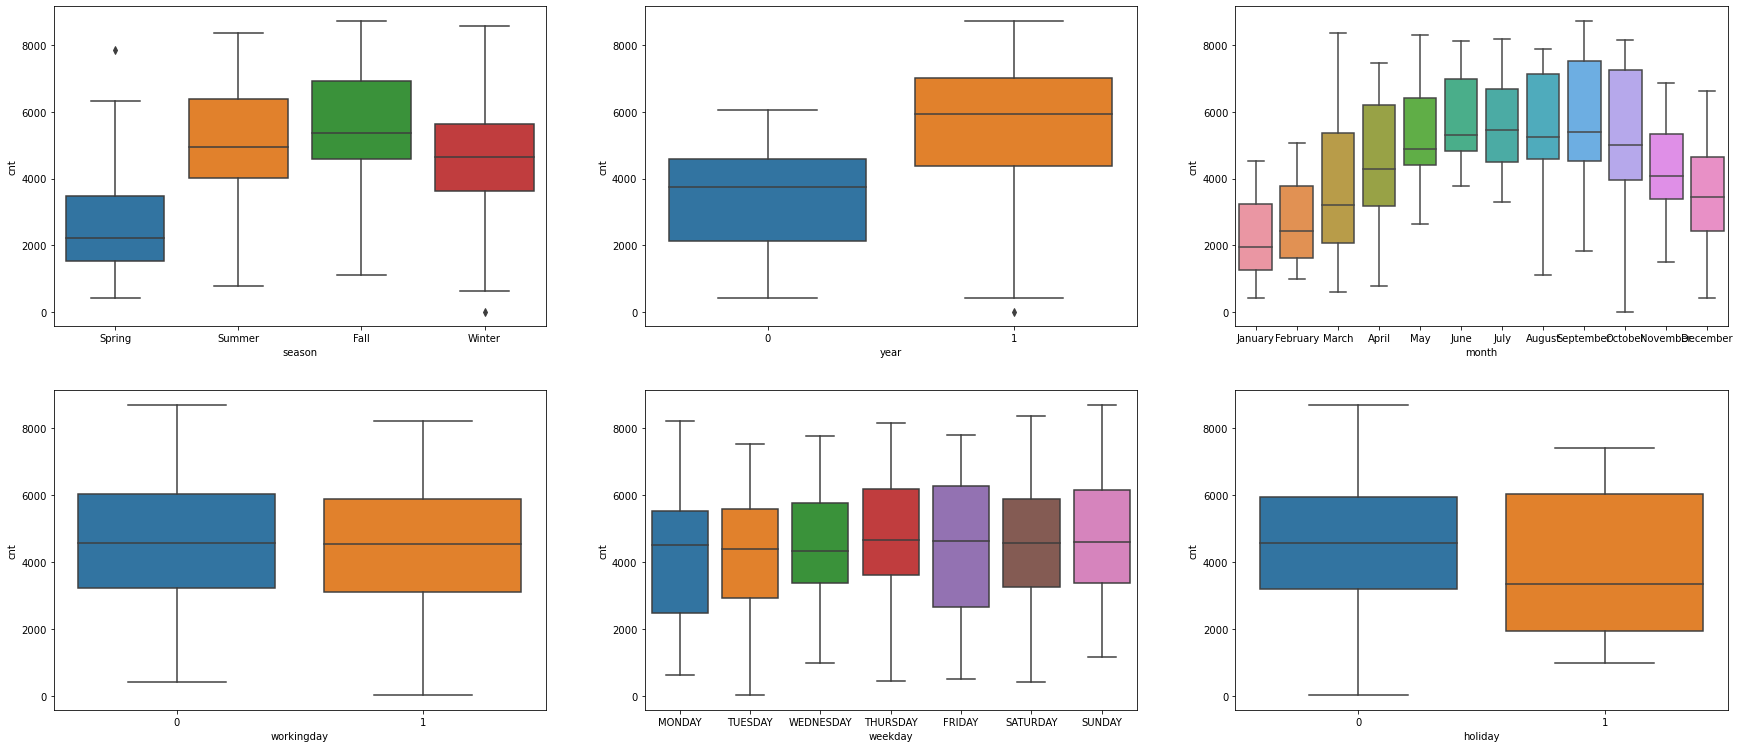

In [50]:
plt.figure(figsize=(30,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = br_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'cnt', data = br_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'cnt', data = br_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = br_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = br_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = br_data)
plt.show()

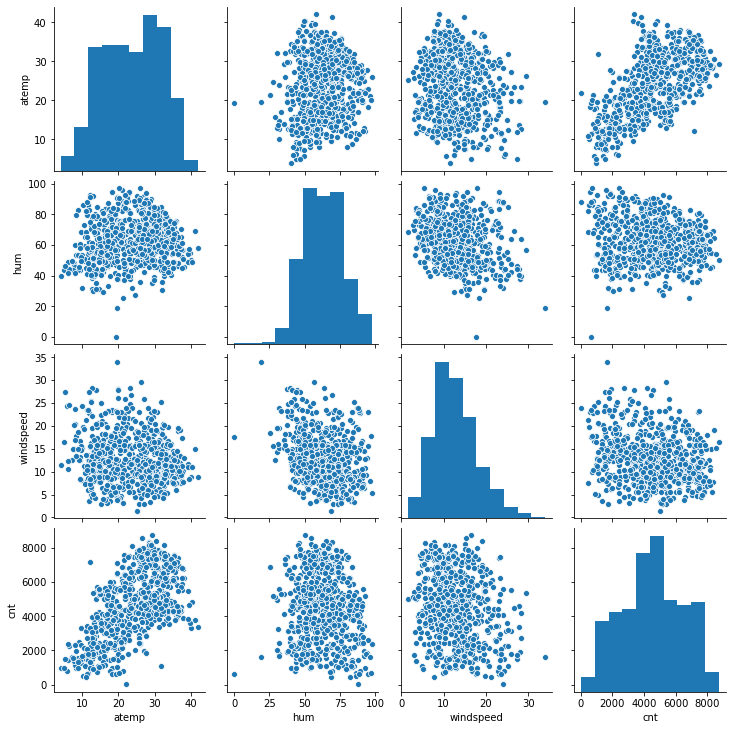

In [51]:
data_check2 = br_data[['atemp','hum','windspeed','cnt']]
sns.pairplot(data_check2)
plt.show()

In [133]:
#checking total 'cnt' for years 2018 and 2019

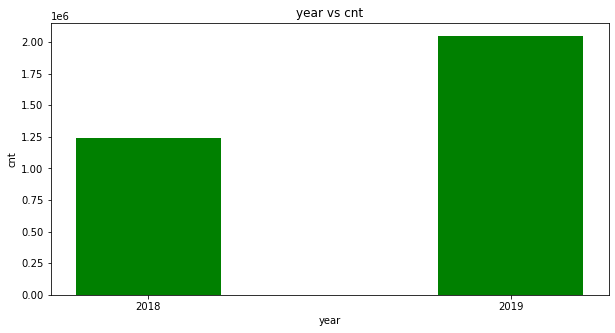

In [52]:
data_2018 = br_data[br_data['year'] == 0] 
a = data_2018['cnt'].sum(axis = 0, skipna = True)
data_2019 = br_data[br_data['year'] == 1] 
b = data_2019['cnt'].sum(axis = 0, skipna = True)
data = {'2018':a, '2019':b }

year = list(data.keys())
cnt = list(data.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(year,cnt, color ='green',
        width = 0.4)
 
plt.xlabel("year")
plt.ylabel("cnt")
plt.title("year vs cnt")
plt.show()

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        VI ) Creating Dummy Variables
        </span>    
    </font>
</h2>

In [53]:
season1 = pd.get_dummies(br_data['season'], drop_first = True)

In [54]:
season1.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [55]:
weathersit1 = pd.get_dummies(br_data['weathersit'], drop_first = True)

In [56]:
month1 = pd.get_dummies(br_data['month'], drop_first = True)

In [57]:
weekday1 = pd.get_dummies(br_data['weekday'], drop_first = True)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        VII ) Merging the Dataframes
        </span>    
    </font>
</h2>

In [58]:
br_data1 = pd.concat([br_data,season1,weathersit1,month1,weekday1], axis = 1)

In [59]:
br_data1.head()

,season,year,month,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
0,Spring,0,January,0,MONDAY,1,Mist_Cloudy,18.18125,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,Spring,0,January,0,TUESDAY,1,Mist_Cloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,Spring,0,January,0,WEDNESDAY,1,Clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,Spring,0,January,0,THURSDAY,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,Spring,0,January,0,FRIDAY,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [134]:
#removing unncecessary columns

In [60]:
br_data1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)
br_data1.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
br_data1.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'Spring', 'Summer', 'Winter', 'Light_Rain_Light_Snow', 'Mist_Cloudy',
       'August', 'December', 'February', 'January', 'July', 'June', 'March',
       'May', 'November', 'October', 'September', 'MONDAY', 'SATURDAY',
       'SUNDAY', 'THURSDAY', 'TUESDAY', 'WEDNESDAY'],
      dtype='object')

In [62]:
br_data1.shape

(730, 29)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        VIII ) Splitting the Data Set into Training and Testing Data Sets
        </span>    
    </font>
</h2>

In [135]:
from sklearn.model_selection import train_test_split

In [64]:
br_train, br_test = train_test_split(br_data1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
br_train.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
br_test.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,1,0,0,1,0,0,0,0
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [67]:
br_train.shape

(510, 29)

In [68]:
br_test.shape

(219, 29)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
#rescaling using minmaxscaler

In [70]:
scaler=MinMaxScaler()

In [137]:
#Applying the Scalar Transformation to 'atemp', 'hum', 'windspeed', 'cnt'

In [71]:
br_train[['atemp', 'atemp', 'hum', 'windspeed', 'cnt']] = scaler.fit_transform(br_train[['atemp', 'atemp', 'hum', 'windspeed', 'cnt']])

br_train.head()

,year,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [72]:
br_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   atemp                  510 non-null    float64
 4   hum                    510 non-null    float64
 5   windspeed              510 non-null    float64
 6   cnt                    510 non-null    float64
 7   Spring                 510 non-null    uint8  
 8   Summer                 510 non-null    uint8  
 9   Winter                 510 non-null    uint8  
 10  Light_Rain_Light_Snow  510 non-null    uint8  
 11  Mist_Cloudy            510 non-null    uint8  
 12  August                 510 non-null    uint8  
 13  December               510 non-null    uint8  
 14  February               510 non-null    uint8  
 15  Janua

In [73]:
br_train.describe()

,year,holiday,workingday,atemp,hum,windspeed,cnt,Spring,Summer,Winter,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.084314,0.086275,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.278131,0.281045,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        IX ) Linear Model Building
        </span>    
    </font>
</h2>

In [74]:
trN_y = br_train.pop('cnt')
trN_x = br_train

In [75]:
trN_x.size

14280

In [76]:
trN_x.shape

(510, 28)

In [77]:
trN_x.head(3)

,year,holiday,workingday,atemp,hum,windspeed,Spring,Summer,Winter,Light_Rain_Light_Snow,...,May,November,October,September,MONDAY,SATURDAY,SUNDAY,THURSDAY,TUESDAY,WEDNESDAY
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [78]:
trN_y.size

510

In [79]:
trN_y.head(3)

653    0.864243
576    0.827658
426    0.465255
Name: cnt, dtype: float64

In [139]:
#running RFE

In [80]:
lin_m = LinearRegression()
lin_m.fit(trN_x,trN_y)

RFE = RFE(lin_m, 15)             
RFE = RFE.fit(trN_x,trN_y)

In [140]:
#observing the selected parameters

In [81]:
list(zip(trN_x.columns,RFE.support_,RFE.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 5),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light_Rain_Light_Snow', True, 1),
 ('Mist_Cloudy', True, 1),
 ('August', True, 1),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', False, 10),
 ('June', False, 7),
 ('March', False, 14),
 ('May', False, 6),
 ('November', True, 1),
 ('October', False, 12),
 ('September', True, 1),
 ('MONDAY', False, 9),
 ('SATURDAY', False, 3),
 ('SUNDAY', False, 4),
 ('THURSDAY', False, 13),
 ('TUESDAY', False, 8),
 ('WEDNESDAY', False, 11)]

In [141]:
#storing the columns in 'RFE_col'

In [82]:
RFE_col = trN_x.columns[RFE.support_]

In [83]:
RFE_col

Index(['year', 'holiday', 'atemp', 'hum', 'windspeed', 'Summer', 'Winter',
       'Light_Rain_Light_Snow', 'Mist_Cloudy', 'August', 'December',
       'February', 'January', 'November', 'September'],
      dtype='object')

In [142]:
# Creation of a dataframe 'trN_RFE_x' with selected variables (post RFE)

In [84]:
trN_RFE_x = trN_x[RFE_col]

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        X ) Model - I
        </span>    
    </font>
</h2>

In [144]:
#adding a constant

In [85]:
trN_RFE_x1 = sms.add_constant(trN_RFE_x)

In [145]:
#creating the model

In [86]:
lin_m = sms.OLS(trN_y,trN_RFE_x1).fit()

In [87]:
summary = lin_m.summary()

In [146]:
#printing the summary of the linear regression model

In [88]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.26e-186
Time:                        09:33:58   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.29

In [147]:
#Calculate VIF Score

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,Winter,3.04
5,Summer,2.28
8,Mist_Cloudy,2.24
0,year,2.06
12,January,1.92
13,November,1.85
10,December,1.63


In [148]:
#drop 'hum' due to high VIF score

In [90]:
trN_RFE_x=trN_RFE_x.drop(['hum'],axis=1)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        XI ) Model - II
        </span>    
    </font>
</h2>

In [151]:
#adding a constant

In [91]:
trN_RFE_x1 = sms.add_constant(trN_RFE_x)

In [152]:
#building the next model

In [92]:
lin_m1 = sms.OLS(trN_y,trN_RFE_x1).fit()


In [153]:
#printing the summary of the model

In [93]:
print(lin_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          7.00e-184
Time:                        09:33:58   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [154]:
#calculate the VIF score

In [94]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,Winter,2.62
0,year,2.06
4,Summer,2.04
12,November,1.81
8,August,1.59
7,Mist_Cloudy,1.57
9,December,1.41
13,September,1.35


In [155]:
#drop 'atemp' due to high VIF score

In [95]:
trN_RFE_x=trN_RFE_x.drop(['atemp'],axis=1)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
        XII ) Model - III
        </span>    
    </font>
</h2>

In [157]:
#adding a constant

In [96]:
trN_RFE_x2 = sms.add_constant(trN_RFE_x)

In [158]:
#building the next model

In [97]:
lin_m2 = sms.OLS(trN_y,trN_RFE_x2).fit()

In [159]:
#printing the summary of this model

In [98]:
print(lin_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          6.20e-149
Time:                        09:33:59   Log-Likelihood:                 413.36
No. Observations:                 510   AIC:                            -798.7
Df Residuals:                     496   BIC:                            -739.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.51

In [160]:
#Calculating the VIF scores

In [99]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
2,windspeed,3.06
4,Winter,2.49
0,year,1.85
3,Summer,1.80
11,November,1.80
6,Mist_Cloudy,1.55
8,December,1.40
10,January,1.27
9,February,1.26
7,August,1.24


In [161]:
#dropping 'windspeed ' due to high VIF Score

In [100]:
trN_RFE_x=trN_RFE_x.drop(['windspeed'],axis=1)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XIII ) Model - IV
        </span>    
    </font>
</h2>

In [163]:
#adding a constant

In [101]:
trN_RFE_x3 = sms.add_constant(trN_RFE_x)

In [164]:
#building the next model

In [102]:
lin_m3 = sms.OLS(trN_y,trN_RFE_x3).fit()

In [165]:
#printing the summary of the model

In [103]:
print(lin_m3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     118.3
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          4.35e-137
Time:                        09:33:59   Log-Likelihood:                 382.62
No. Observations:                 510   AIC:                            -739.2
Df Residuals:                     497   BIC:                            -684.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.44

In [167]:
#calculating the VIF score [ this code has been run after all the models have been built - hence the output is different - 'winter' had a high VIF score ]

In [166]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
0,year,1.54
3,Mist_Cloudy,1.46
4,August,1.13
7,January,1.13
8,November,1.12
9,September,1.12
10,March,1.11
11,May,1.11
5,December,1.09
6,February,1.08


In [168]:
#dropping 'winter' due to the high VIF score

In [105]:
trN_RFE_x=trN_RFE_x.drop(['Winter'],axis=1)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XIV ) Model - V
        </span>    
    </font>
</h2>

In [106]:
trN_RFE_x4 = sms.add_constant(trN_RFE_x)

In [107]:
lin_m4 = sms.OLS(trN_y,trN_RFE_x4).fit()

In [108]:
print(lin_m4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     119.4
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          6.54e-132
Time:                        09:33:59   Log-Likelihood:                 367.80
No. Observations:                 510   AIC:                            -711.6
Df Residuals:                     498   BIC:                            -660.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.47

In [170]:
#dropping 'Summer' due to a value higher than 0.5 in the P>|t| column

In [109]:
trN_RFE_x=trN_RFE_x.drop(['Summer'],axis=1)

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XV ) Model - VI
        </span>    
    </font>
</h2>

In [110]:
trN_RFE_x5 = sms.add_constant(trN_RFE_x)

In [111]:
lin_m5 = sms.OLS(trN_y,trN_RFE_x5).fit()

In [112]:
print(lin_m5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     131.5
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          6.15e-133
Time:                        09:33:59   Log-Likelihood:                 367.70
No. Observations:                 510   AIC:                            -713.4
Df Residuals:                     499   BIC:                            -666.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.47

In [113]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
0,year,1.42
3,Mist_Cloudy,1.34
4,August,1.11
7,January,1.10
8,November,1.10
9,September,1.10
5,December,1.07
1,holiday,1.06
6,February,1.06
2,Light_Rain_Light_Snow,1.02


<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XVI ) Model - VII
        </span>    
    </font>
</h2>

In [173]:
#adding 'March' to the dataset

In [114]:
trN_RFE_x['March']=trN_x['March']
trN_RFE_x.head()

,year,holiday,Light_Rain_Light_Snow,Mist_Cloudy,August,December,February,January,November,September,March
653,1,0,0,0,0,0,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,0,0
426,1,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0,0,1,0,0,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0


In [174]:
#adding a constant, building the next model and printing the summary of the model

In [115]:
trN_RFE_x6 = sms.add_constant(trN_RFE_x)
lin_m6 = sms.OLS(trN_y,trN_RFE_x6).fit()
print(lin_m6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.6
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.56e-150
Time:                        09:33:59   Log-Likelihood:                 411.98
No. Observations:                 510   AIC:                            -800.0
Df Residuals:                     498   BIC:                            -749.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [116]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
0,year,1.48
3,Mist_Cloudy,1.38
4,August,1.12
7,January,1.11
8,November,1.11
9,September,1.11
10,March,1.10
5,December,1.08
6,February,1.07
1,holiday,1.06


In [175]:
#retaining 'March'

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XVII ) Model - VIII
        </span>    
    </font>
</h2>

In [177]:
#adding 'May' to the dataset

In [117]:
trN_RFE_x['May']=trN_x['May']

In [178]:
#adding a constant, building the next model and printing the summary

In [118]:
trN_RFE_x7 = sms.add_constant(trN_RFE_x)
lin_m7 = sms.OLS(trN_y,trN_RFE_x7).fit()
print(lin_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.07e-149
Time:                        09:33:59   Log-Likelihood:                 412.61
No. Observations:                 510   AIC:                            -799.2
Df Residuals:                     497   BIC:                            -744.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [119]:
VarInFac = pd.DataFrame()
x1 = trN_RFE_x
VarInFac['Features'] = x1.columns
VarInFac['VIF'] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
VarInFac['VIF'] = round(VarInFac['VIF'], 2)
VarInFac = VarInFac.sort_values(by = "VIF", ascending = False)
VarInFac

,Features,VIF
0,year,1.54
3,Mist_Cloudy,1.46
4,August,1.13
7,January,1.13
8,November,1.12
9,September,1.12
10,March,1.11
11,May,1.11
5,December,1.09
6,February,1.08


In [179]:
#retaining 'May'

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XVIII ) Checking Normality of Errors
        </span>    
    </font>
</h2>

Text(0.5, 0, 'Errors')

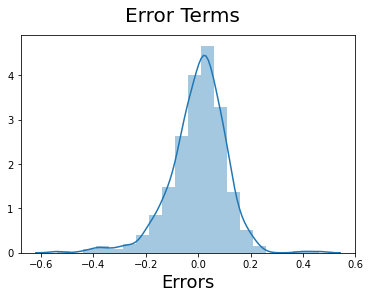

In [120]:
y_1 = lin_m7.predict(trN_RFE_x7)
fig = plt.figure()
sns.distplot((trN_y - y_1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                         

<h2>
    <font color = brown>
        <span style='font-family:Arial'>
    XIX ) Developing Predictions using the final linear regression model
        </span>    
    </font>
</h2>

In [182]:
#applying scalar to 'cnt', 'hum', 'windspeed'm 'atemp'

In [121]:
br_test[['cnt','hum','windspeed','atemp']] = scaler.fit_transform(br_test[['cnt','hum','windspeed','atemp']])

In [184]:
#dividing br_test into test_y and test_x

In [122]:
test_y = br_test.pop('cnt')
test_x = br_test

In [123]:
trN_x_n = trN_RFE_x7.drop(['const'], axis=1)

In [124]:
test_x_n = test_x[trN_x_n.columns]
test_x_n = sms.add_constant(test_x_n)

In [186]:
#building the prediction using the final linear regression model

In [125]:
prediction_y = lin_m7.predict(test_x_n)

In [187]:
#plotting the test and the prediction values to evaluate the extent of spread 

Text(0, 0.5, 'prediction_y')

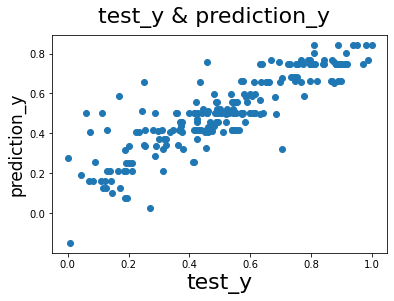

In [126]:
fig = plt.figure()
plt.scatter(test_y,prediction_y)
fig.suptitle('test_y & prediction_y', fontsize=22)              
plt.xlabel('test_y', fontsize=22)                         
plt.ylabel('prediction_y', fontsize=17) 

In [127]:
print(lin_m7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     138.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          1.07e-149
Time:                        09:34:00   Log-Likelihood:                 412.61
No. Observations:                 510   AIC:                            -799.2
Df Residuals:                     497   BIC:                            -744.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.50

In [128]:
#We can see above that the R-squared value is 0.769

In [129]:
from sklearn.metrics import r2_score

In [130]:
R_Squared = r2_score(test_y, prediction_y)
R_Squared
#We can see above that out model's R-squared value is 0.769

0.741841562068293

In [188]:
#final parameters and respective coefficient values

In [131]:
parameters = pd.DataFrame(lin_m7.params)
parameters.insert(0,'Variables',parameters.index)
parameters.rename(columns = {0:'Coefficient value'},inplace = True)
parameters['index'] = list(range(0,13))
parameters.set_index('index',inplace = True)
parameters.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
parameters

,Variables,Coefficient value
index,,
0,const,0.501758
1,year,0.245621
10,September,0.093971
5,August,0.054296
12,May,0.020976
4,Mist_Cloudy,-0.085532
9,November,-0.090762
2,holiday,-0.092490
6,December,-0.161645


The equation of the best fitted line is : 

cnt = 0.501758 + 0.245621[year] + 0.093971[September] + 0.054296[August] + 0.020976[May] + 0.085532[Mist_Cloudy] - 0.090762[November] - 0.092490[holiday] - 0.161645[December] - 0.163039[March] - 0.163039[February] - 0.310767[Light_Rain_Light_Snow] - -0.338855[January ]

We can see that the parameters year, september, august, may, the misty_cloudy [Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist] are positively impacting the demand. 

We also observe that parameters november, holiday, december, march, february, january and Light Snow, Light Rain Weathersit [Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds] are negatively impacting the demand.